# Week 3, Day 3: Logistic Regression

## Learning Objectives
- Understand Logistic Regression concepts
- Learn binary and multiclass classification
- Master model evaluation techniques
- Practice implementing Logistic Regression

## Topics Covered
1. Binary Classification
2. Multiclass Classification
3. Model Evaluation
4. ROC Curves and AUC

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

## 1. Binary Classification

Model Performance:

Confusion Matrix:
[[32  0]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



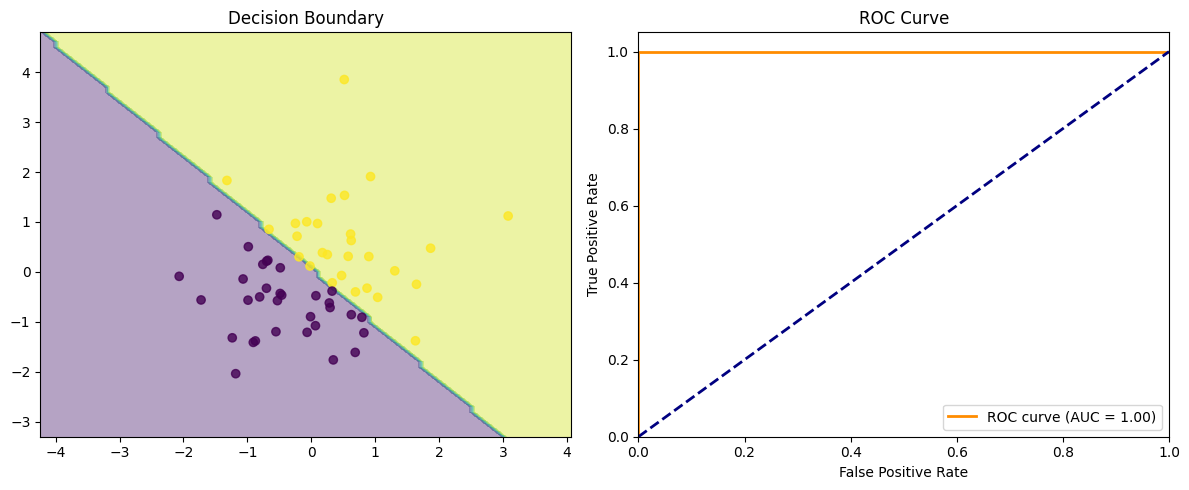

In [3]:
def binary_classification_example():
    # Generate synthetic data
    np.random.seed(42)
    n_samples = 300

    # Create two features
    X = np.random.randn(n_samples, 2)
    # Create two classes
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Print model performance
    print("Model Performance:")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize decision boundary
    plt.figure(figsize=(12, 5))

    # Decision boundary plot
    plt.subplot(121)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
    plt.title('Decision Boundary')

    # ROC curve
    plt.subplot(122)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

binary_classification_example()

## 2. Multiclass Classification

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Performance:

Confusion Matrix:
[[56  0  4]
 [ 0 65  2]
 [ 2  2 49]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        60
         1.0       0.97      0.97      0.97        67
         2.0       0.89      0.92      0.91        53

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.95      0.94      0.94       180



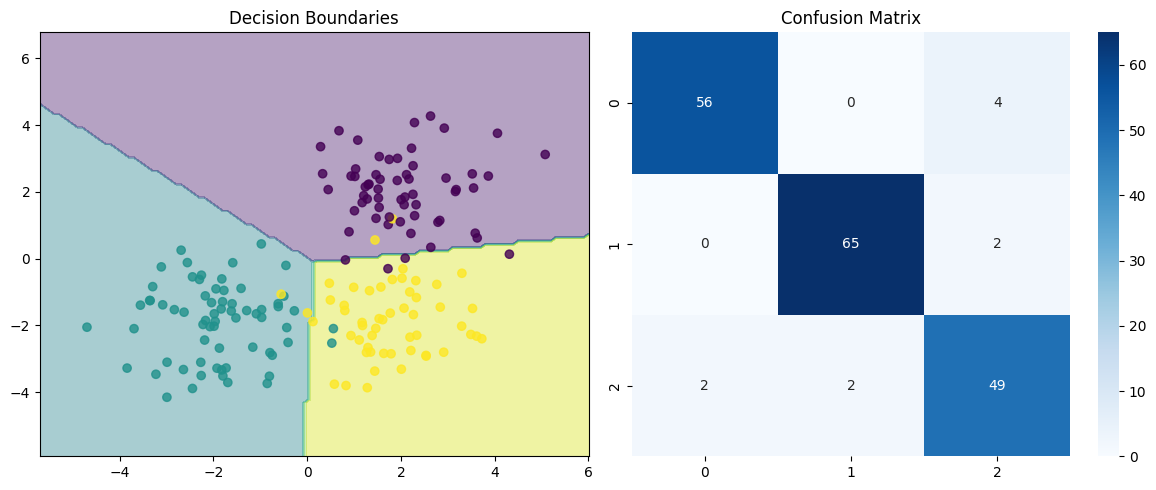

In [4]:
def multiclass_classification_example():
    # Generate synthetic data
    np.random.seed(42)
    n_samples = 300

    # Create three clusters
    X = np.vstack([
        np.random.randn(n_samples, 2) + np.array([2, 2]),
        np.random.randn(n_samples, 2) + np.array([-2, -2]),
        np.random.randn(n_samples, 2) + np.array([2, -2])
    ])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples), np.ones(n_samples) * 2])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train model
    model = LogisticRegression(multi_class='multinomial', random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Print model performance
    print("Model Performance:")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize results
    plt.figure(figsize=(12, 5))

    # Decision boundary plot
    plt.subplot(121)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
    plt.title('Decision Boundaries')

    # Confusion matrix heatmap
    plt.subplot(122)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

multiclass_classification_example()

## 3. Feature Importance and Model Interpretation

In [ ]:
def interpret_model():
    # Generate synthetic data with meaningful features
    np.random.seed(42)
    n_samples = 1000

    # Create features
    age = np.random.normal(35, 10, n_samples)
    income = np.random.normal(50000, 20000, n_samples)
    credit_score = np.random.normal(700, 50, n_samples)

    # Create target (loan approval)
    X = np.column_stack([age, income, credit_score])
    prob = 1 / (1 + np.exp(-(0.03 * age + 0.00002 * income + 0.01 * credit_score - 10)))
    y = (np.random.random(n_samples) < prob).astype(int)

    # Create DataFrame
    df = pd.DataFrame({
        'Age': age,
        'Income': income,
        'Credit_Score': credit_score,
        'Approved': y
    })

    # Split and scale data
    X = df[['Age', 'Income', 'Credit_Score']]
    y = df['Approved']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Print feature importance
    print("Feature Importance:")
    for feature, coef in zip(X.columns, model.coef_[0]):
        print(f"{feature}: {coef:.4f}")

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X.columns, model.coef_[0])
    plt.title('Feature Importance')
    plt.xticks(rotation=45)
    plt.show()

    # Calculate odds ratios
    print("\nOdds Ratios (effect of one std dev change):")
    for feature, coef in zip(X.columns, model.coef_[0]):
        odds_ratio = np.exp(coef)
        print(f"{feature}: {odds_ratio:.4f}")

interpret_model()

## Practical Exercises

In [ ]:
# Exercise 1: Customer Churn Prediction

def customer_churn_prediction():
    # Generate synthetic customer data
    np.random.seed(42)
    n_samples = 1000

    # Create features
    tenure = np.random.randint(1, 72, n_samples)  # months
    monthly_charges = np.random.normal(70, 30, n_samples)
    total_charges = tenure * monthly_charges + np.random.normal(0, 100, n_samples)
    satisfaction_score = np.random.randint(1, 6, n_samples)

    # Create DataFrame
    data = pd.DataFrame({
        'Tenure': tenure,
        'MonthlyCharges': monthly_charges,
        'TotalCharges': total_charges,
        'SatisfactionScore': satisfaction_score
    })

    # Generate churn (more likely with high charges and low satisfaction)
    prob_churn = 1 / (1 + np.exp(-(0.03 * monthly_charges - 0.5 * satisfaction_score)))
    data['Churned'] = (np.random.random(n_samples) < prob_churn).astype(int)

    print("Sample of customer data:")
    print(data.head())

    # Task: Build a logistic regression model to predict customer churn
    # 1. Prepare the data
    # 2. Split into training and test sets
    # 3. Scale the features
    # 4. Train the model
    # 5. Evaluate performance
    # 6. Analyze feature importance

    # Your code here

customer_churn_prediction()

In [ ]:
# Exercise 2: Model Comparison

def compare_models():
    # Generate nonlinear data
    np.random.seed(42)
    n_samples = 1000

    # Create spiral data
    def make_spiral(n_samples, noise=0.5):
        n = np.sqrt(np.random.rand(n_samples,1)) * 780 * (2*np.pi)/360
        d1x = -np.cos(n)*n + np.random.rand(n_samples,1) * noise
        d1y = np.sin(n)*n + np.random.rand(n_samples,1) * noise
        return np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y))))

    X = make_spiral(n_samples//2)
    y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

    # Task: Compare logistic regression with polynomial features
    # 1. Train basic logistic regression
    # 2. Create polynomial features and train another model
    # 3. Compare their performance
    # 4. Visualize decision boundaries

    # Your code here

compare_models()

## MCQ Quiz

1. What type of problem is logistic regression used for?
   - a) Regression
   - b) Classification
   - c) Clustering
   - d) Dimensionality reduction

2. What is the output range of a logistic regression model?
   - a) -∞ to +∞
   - b) 0 to 1
   - c) -1 to 1
   - d) 0 to ∞

3. Which metric is NOT typically used for evaluating logistic regression?
   - a) Accuracy
   - b) Precision
   - c) Mean Squared Error
   - d) ROC AUC

4. What does ROC curve show?
   - a) Error rate vs iterations
   - b) True Positive Rate vs False Positive Rate
   - c) Precision vs Recall
   - d) Accuracy vs threshold

5. What is the purpose of the sigmoid function in logistic regression?
   - a) Feature scaling
   - b) Converting linear output to probabilities
   - c) Regularization
   - d) Feature selection

6. Which method is used to find the optimal parameters in logistic regression?
   - a) Least squares
   - b) Maximum likelihood
   - c) Mean absolute error
   - d) K-means

7. What is multiclass logistic regression also called?
   - a) One-vs-All
   - b) Multinomial logistic regression
   - c) Softmax regression
   - d) All of the above

8. What does a confusion matrix show?
   - a) Model accuracy
   - b) True/False Positives/Negatives
   - c) ROC curve
   - d) Feature importance

9. What is the default threshold for binary classification in logistic regression?
   - a) 0
   - b) 0.5
   - c) 1
   - d) Depends on the data

10. Which regularization methods can be used with logistic regression?
    - a) L1 (Lasso)
    - b) L2 (Ridge)
    - c) Elastic Net
    - d) All of the above

Answers: 1-b, 2-b, 3-c, 4-b, 5-b, 6-b, 7-d, 8-b, 9-b, 10-d